## Object reconstruction from a cloud of points in 2D using $\alpha$-shapes and Vietoris-Rips complexes

In [150]:
import dionysus
import math
from random import random
from matplotlib import pyplot

In [23]:
def generate_circle(n, radius, max_noise):
    """
    Generate n points on a sphere with the center in the point (0,0) 
    with the given radius. 
    
    Noise is added so that the distance from
    the generated point to some point on the sphere does not
    exceed max_noise parameter.
    
    Returns the list of generated points.    
    """
    points = []
    for i in range(n):
        angle = 2 * math.pi * random()
        noise = max_noise * random()
        r = radius * (1 + noise)
        point = [r * math.cos(angle), r * math.sin(angle)]
        points.append(point)
    return points

In [24]:
def plot_points(points):
    """
    Plot the given list of points using matplotlib.
    """
    xs, ys = map(list, zip(*points))
    pyplot.axis([min(xs)-1, max(xs)+1,min(ys)-1,max(ys)+1])
    pyplot.plot(xs, ys, 'ro')

<IPython.core.display.Javascript object>


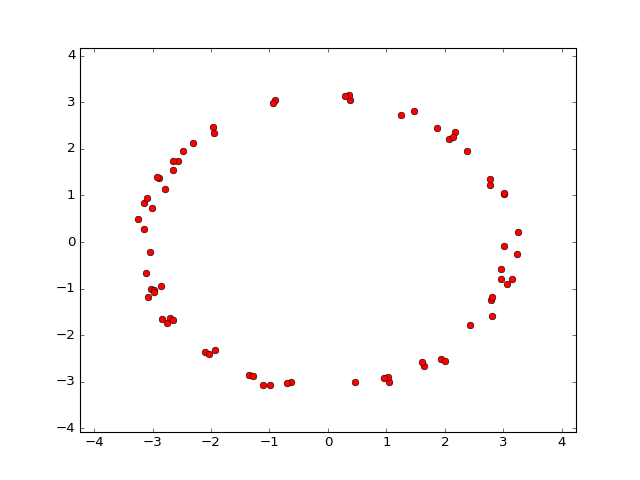

In [25]:
%matplotlib notebook
circle = generate_circle(70, 3, 0.1)
plot_points(circle)

Now construct $\alpha$-shapes and Vietoris-Rips complex from this cloud of points.

In [100]:
from    dionysus    import Rips, PairwiseDistances, StaticPersistence, Filtration, points_file, \
                           ExplicitDistances, data_dim_cmp
import  time

def rips(points, skeleton, max):
    """
    Generate the Vietoris-Rips complex on the given set of points in 2D.
    Only simplexes up to dimension skeleton are computed.
    The max parameter denotes the radious used in VR-construction.
    """
    distances = PairwiseDistances(points)
    rips = Rips(distances)
    simplices = Filtration()
    rips.generate(skeleton, max, simplices.append)
    print time.asctime(), "Generated complex: %d simplices" % len(simplices)

    # While this step is unnecessary (Filtration below can be passed rips.cmp), 
    # it greatly speeds up the running times
    for s in simplices: s.data = rips.eval(s)
    print time.asctime(), simplices[0], '...', simplices[-1]
    return [list(simplex.vertices) for simplex in simplices]

Define functions that produce a drawing of a given simplicial complex.

In [101]:
def get_points(points, indices):
    return [points[index] for index in indices]

def draw_triangle(triangle):
    p1, p2, p3 = triangle
    pyplot.plot([p1[0], p2[0]],[p1[1],p2[1]])
    pyplot.plot([p1[0], p3[0]],[p1[1],p3[1]])
    pyplot.plot([p2[0], p3[0]],[p2[1],p3[1]])
        
def draw_line(line):
    p1, p2 = line
    pyplot.plot([p1[0], p2[0]],[p1[1],p2[1]])
    
def draw_point(point):
    pyplot.plot(point)    

def draw_simplicial_complex(simplices, points):
    handlers = [draw_point, draw_line, draw_triangle]
    for simplex in simplices:
        handler = handlers[len(simplex)-1]
        handler(get_points(points, simplex))

Mon Apr  4 10:01:39 2016 Generated complex: 684 simplices
Mon Apr  4 10:01:39 2016 <0> 0.000000 ... <69> 0.000000


<IPython.core.display.Javascript object>


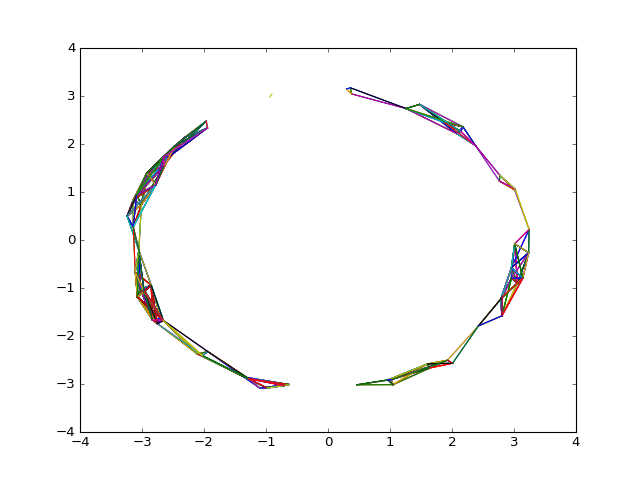

In [151]:
%matplotlib notebook
rips_complex = rips(points=circle, skeleton=2, max=1)
draw_simplicial_complex(rips_complex, circle)

In [139]:
from    dionysus        import Filtration, fill_alpha_complex

def alpha(points, radius):
    f = Filtration()
    fill_alpha_complex(points, f)
    ret = [list(s.vertices) for s in f if s.data[0] <= radius]
    print "Total number of simplices:", len(ret)
    return ret

Total number of simplices: 241


<IPython.core.display.Javascript object>


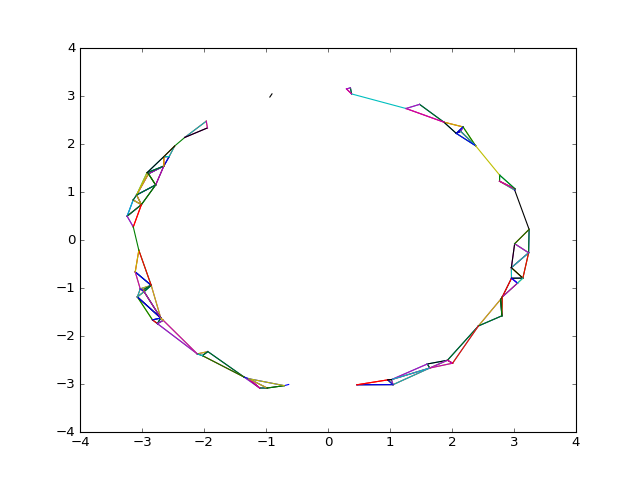

In [153]:
%matplotlib notebook
alpha_shapes = alpha(circle, 0.25)
draw_simplicial_complex(alpha_shapes, circle)